In [85]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


 ### Завдання для бінарної класифікації (Binary Classification):
   - Використовуйте набір даних "classification_dataset.csv" для бінарної класифікації.
   - Розділіть дані на навчальний та тестовий набори.
   - Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і AUC-ROC.
   - Візуалізуйте матрицю плутанини та навчіться розпізнавати типи помилок.


In [86]:
data = pd.read_csv('classification_dataset.csv')

X = data[['Feature1', 'Feature2']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Точність: {accuracy:.2f}")
print(f"Відгук: {recall:.2f}")
print(f"F1-середнє: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Точність: 0.88
Відгук: 1.00
F1-середнє: 0.87
AUC-ROC: 0.89


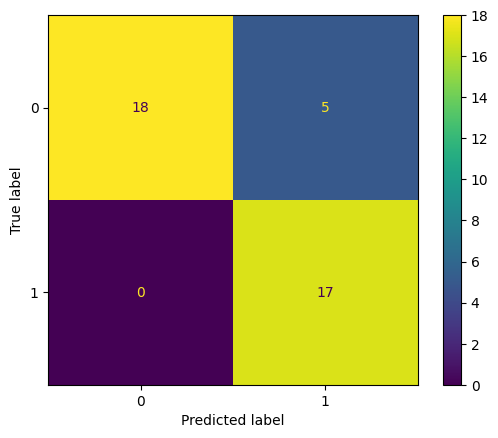

In [88]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

### Завдання для мультикласової класифікації (Multiclass Classification):
   - Використовуйте набір даних "multiclass_dataset.csv" для мультикласової класифікації.
   - Розділіть дані на навчальний та тестовий набори.
   - Навчіть класифікатор (наприклад, Random Forest або нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і матриця плутанини.
   - Порівняйте результати різних класифікаторів.

In [89]:
data = pd.read_csv('multiclass_dataset.csv')

X = data[['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логістична регресія
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Дерево рішень
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# SVM
svm = SVC()
svm.fit(X_train, y_train)


SVC()

Logistic Regression:
/////////////////////////////////////////////
Accuracy: 0.65
Precision: 0.6129
Recall: 0.61
F1-Score: 0.60
/////////////////////////////////////////////
Decision Tree:
/////////////////////////////////////////////
Accuracy: 0.65
Precision: 0.6667
Recall: 0.64
F1-Score: 0.63
/////////////////////////////////////////////
SVM:
/////////////////////////////////////////////
Accuracy: 0.70
Precision: 0.6913
Recall: 0.67
F1-Score: 0.66
/////////////////////////////////////////////


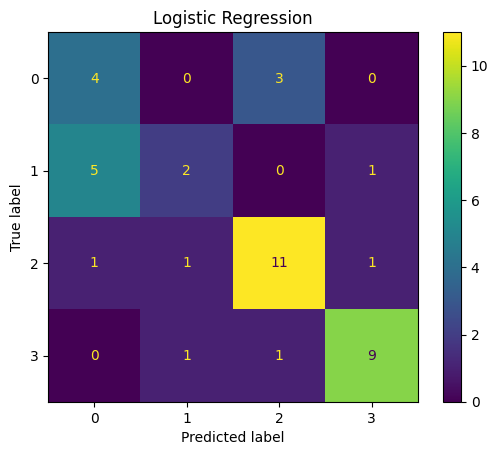

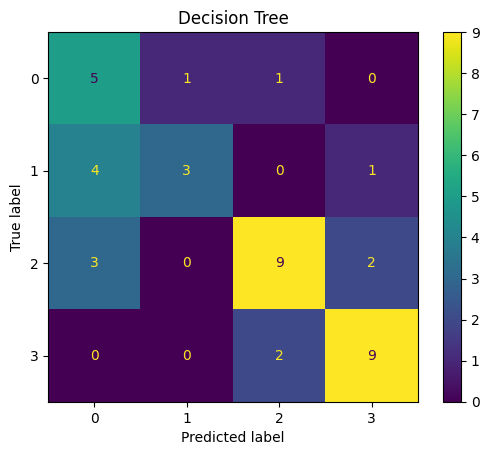

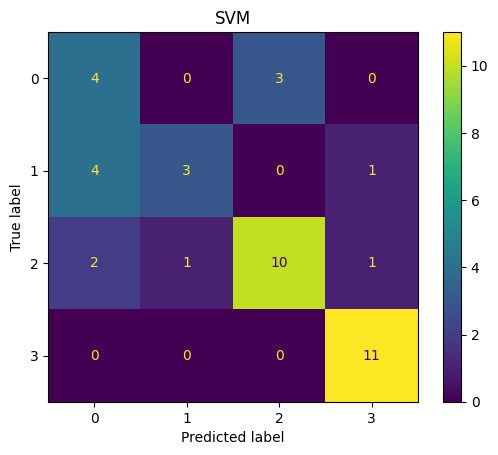

In [90]:

models = {'Logistic Regression': lr, 'Decision Tree': dt, 'SVM': svm}
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"{name}:")
    print(f"/////////////////////////////////////////////")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"/////////////////////////////////////////////")
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(f'{name}')

plt.show()
   



### Завдання для мультилейбл класифікації (Multilabel Classification):
   - Використовуйте набір даних "multilabel_dataset.csv" для мультилейбл класифікації.
   - Розділіть дані на навчальний та тестовий набори.
   - Навчіть класифікатор для прогнозування мультилейблів (наприклад, використовуючи багатошарову нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.
   - Вивчайте, як класифікатори працюють з різними комбінаціями мультилейбів.

In [111]:
data = pd.read_csv('multilabel_dataset.csv')

X = data[['Feature1','Feature2','Feature3']]
y = data[['Label1','Label2','Label3','Label4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

multi_target_classifier = MultiOutputClassifier(mlp, n_jobs=-1)
multi_target_classifier.fit(X_train, y_train)
y_pred = multi_target_classifier.predict(X_test)


In [112]:
y_pred_df = pd.DataFrame(y_pred, columns=y.columns)

# Оцінка моделі для кожного лейбла
for label in y.columns:
    print(f"Classification Report for {label}:")
    print(classification_report(y_test[label], y_pred_df[label]))
    print("////////////////////////////////////////////////")


Classification Report for Label1:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.47      0.78      0.58         9

    accuracy                           0.75        40
   macro avg       0.69      0.76      0.70        40
weighted avg       0.82      0.75      0.77        40

////////////////////////////////////////////////
Classification Report for Label2:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.78      1.00      0.88        21

    accuracy                           0.85        40
   macro avg       0.89      0.84      0.84        40
weighted avg       0.88      0.85      0.85        40

////////////////////////////////////////////////
Classification Report for Label3:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        21
           1       0.77      0.53    